In [39]:
import numpy as np
import pandas as pd
import tweepy as tw
import numpy as np
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
from nltk.corpus import stopwords
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS


# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses


pd.options.plotting.backend = "plotly"

In [2]:
df = pd.read_csv("Twitter_Data.csv")

df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [3]:
df['category'].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

#### working with null values

In [4]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
# The category column has 3 values:

# 0 Indicating it is a Neutral Sentiment
# 1 Indicating a Postive Sentiment
# -1 Indicating a Negative Sentiment

In [7]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


### Define categories

In [8]:
df['category'] = df['category'].map({-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'})


In [9]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral


# Eda

In [12]:
count = df.groupby(['category']).size()
count
# df.groupby(['category']).size().plot(kind = "bar")



category
Negative    35509
Neutral     55211
Positive    72249
dtype: int64

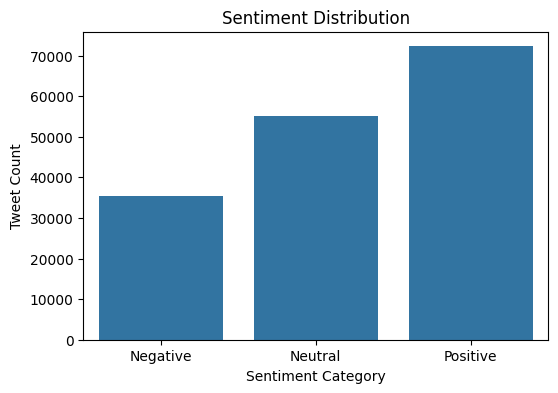

In [14]:
plt.figure(figsize=(6, 4))
sns.barplot(x=count.index, y=count.values)
plt.xlabel("Sentiment Category")
plt.ylabel("Tweet Count")
plt.title("Sentiment Distribution")
plt.show()


In [15]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral


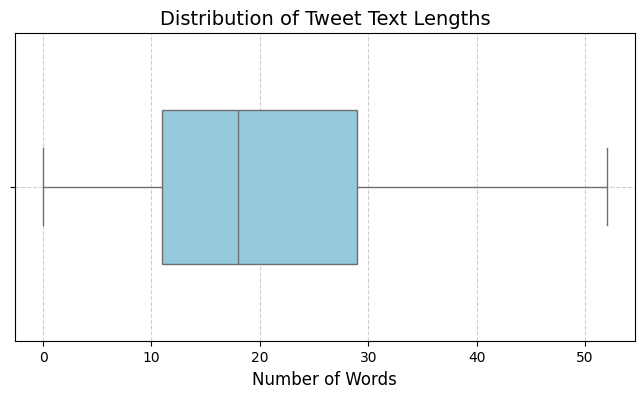

In [17]:
# Add tweet length column
df['tweet_len'] = df['clean_text'].apply(lambda x: len(str(x).split()))

# Improved Box Plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['tweet_len'], color="skyblue", width=0.5)

# Titles & Labels
plt.title('Distribution of Tweet Text Lengths', fontsize=14)
plt.xlabel('Number of Words', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


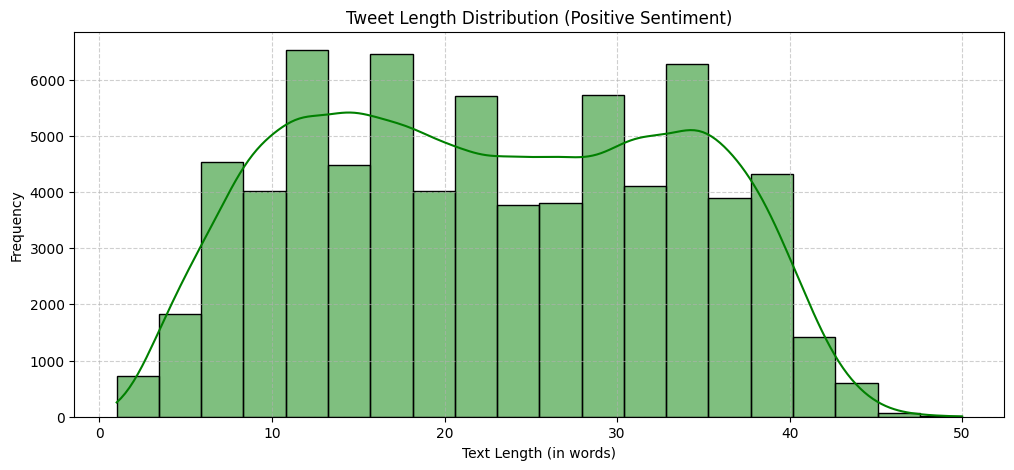

count    72249.00
mean        22.65
std         10.60
min          1.00
25%         14.00
50%         22.00
75%         32.00
max         50.00
Name: length, dtype: float64


In [20]:
df['length'] = df['clean_text'].str.split().apply(len)

# Create figure
plt.figure(figsize=(12, 5))

# Plot histogram for Positive tweets
sns.histplot(df[df['category'] == 'Positive']['length'], color='green', bins=20, kde=True)
plt.title('Tweet Length Distribution (Positive Sentiment)')
plt.xlabel('Text Length (in words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

# Show descriptive statistics
print(df[df['category'] == 'Positive']['length'].describe().round(2))


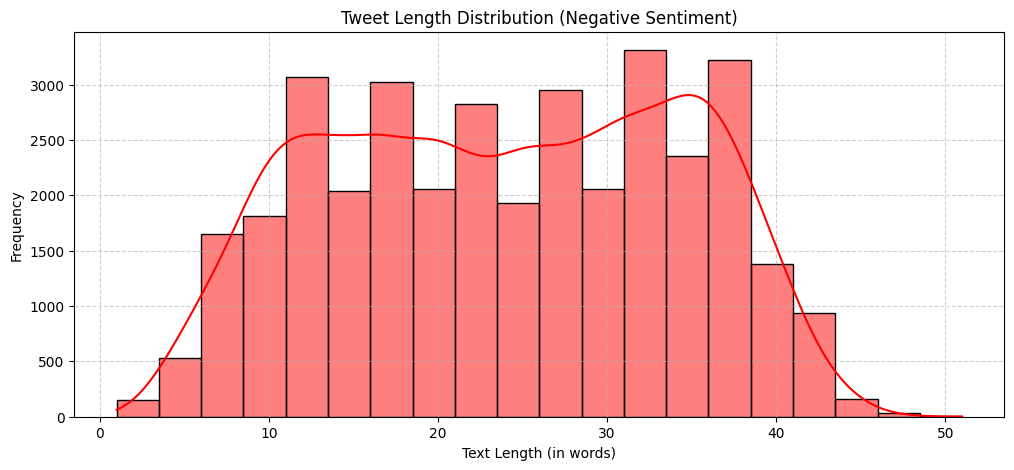

count    35509.00
mean        23.88
std         10.31
min          1.00
25%         15.00
50%         24.00
75%         33.00
max         51.00
Name: length, dtype: float64


In [21]:
df['length'] = df['clean_text'].str.split().apply(len)

# Create figure
plt.figure(figsize=(12, 5))

# Plot histogram for Negative tweets
sns.histplot(df[df['category'] == 'Negative']['length'], color='red', bins=20, kde=True)
plt.title('Tweet Length Distribution (Negative Sentiment)')
plt.xlabel('Text Length (in words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

# Display descriptive statistics
print(df[df['category'] == 'Negative']['length'].describe().round(2))


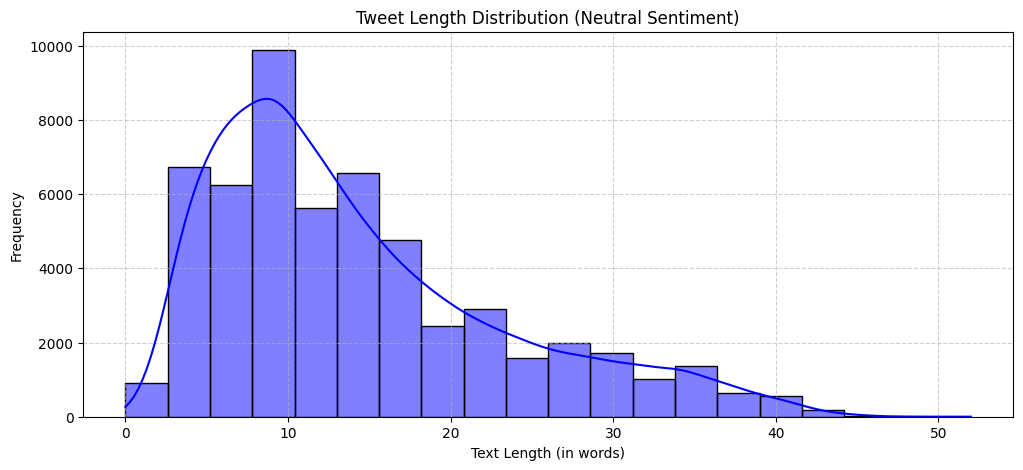

count    55211.00
mean        14.27
std          9.08
min          0.00
25%          7.00
50%         12.00
75%         19.00
max         52.00
Name: length, dtype: float64


In [22]:
df['length'] = df['clean_text'].str.split().apply(len)

# Create figure
plt.figure(figsize=(12, 5))

# Plot histogram for Neutral tweets
sns.histplot(df[df['category'] == 'Neutral']['length'], color='blue', bins=20, kde=True)
plt.title('Tweet Length Distribution (Neutral Sentiment)')
plt.xlabel('Text Length (in words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

# Display descriptive statistics
print(df[df['category'] == 'Neutral']['length'].describe().round(2))


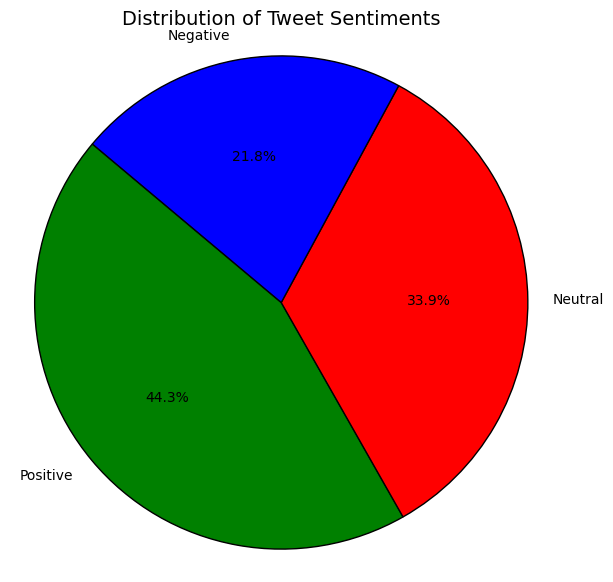

In [23]:
# Count sentiment occurrences
sentiment_counts = df['category'].value_counts()

# Define colors for better clarity
colors = ['green', 'red', 'blue']

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    sentiment_counts, 
    labels=sentiment_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}  # Add edge color for better visibility
)
plt.title('Distribution of Tweet Sentiments', fontsize=14)
plt.axis('equal')  # Ensures the pie is circular

# Show plot
plt.show()


In [24]:
df.drop(['length'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of                                                clean_text  category  tweet_len
0       when modi promised “minimum government maximum...  Negative         33
1       talk all the nonsense and continue all the dra...   Neutral         13
2       what did just say vote for modi  welcome bjp t...  Positive         22
3       asking his supporters prefix chowkidar their n...  Positive         34
4       answer who among these the most powerful world...  Positive         14
...                                                   ...       ...        ...
162975  why these 456 crores paid neerav modi not reco...  Negative         18
162976  dear rss terrorist payal gawar what about modi...  Negative         36
162977  did you cover her interaction forum where she ...   Neutral          9
162978  there big project came into india modi dream p...   Neutral         13
162979  have you ever listen about like gurukul where ...  Positive         34

[162969 rows x 3 colu

### Visualiing with Wordcloud

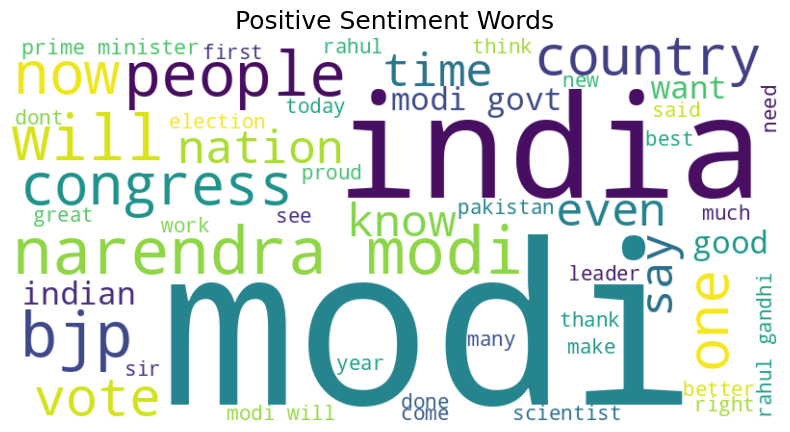

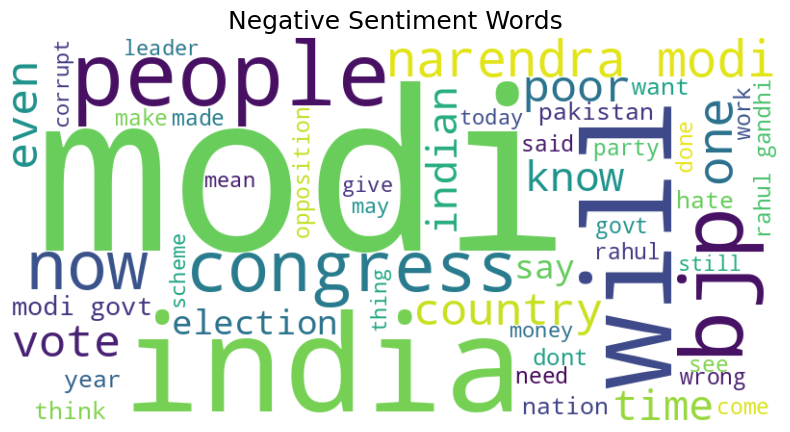

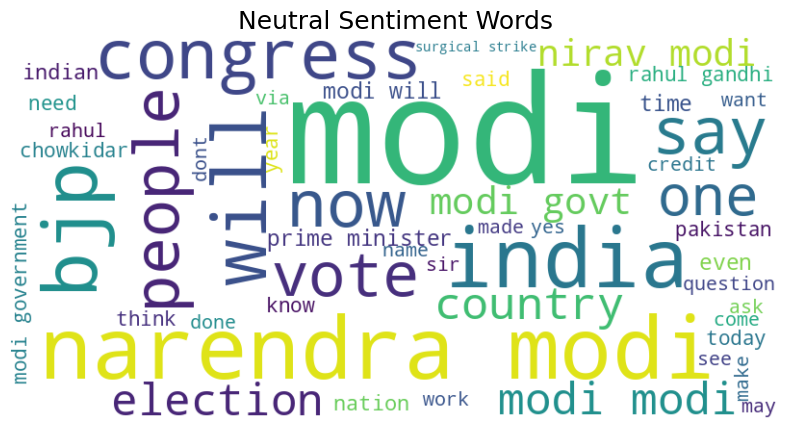

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcount_gen(df, category):
    """
    Generate and display a Word Cloud for a given sentiment category.

    Parameters:
    - category: str, one of ['Positive', 'Negative', 'Neutral']
    """
    # Combine all tweets of the given category
    combined_tweets = " ".join(df[df['category'] == category]['clean_text'])

    # Generate Word Cloud
    wc = WordCloud(
        background_color='white',
        max_words=50,
        stopwords=STOPWORDS,
        width=800,
        height=400
    ).generate(combined_tweets)  # Generate word cloud here

    # Plot the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'{category} Sentiment Words', fontsize=18)
    plt.axis('off')
    plt.show()

# Generate Word Clouds for each sentiment category
for sentiment in ['Positive', 'Negative', 'Neutral']:
    wordcount_gen(df, sentiment)


### Text Pre-processing

In [26]:
# Ensure stopwords are downloaded
nltk.download('stopwords')

# Initialize Porter Stemmer
stemmer = PorterStemmer()

def tweet_to_words(tweet):
    """ Convert tweet text into a cleaned, tokenized, and stemmed sequence of words. """

    # Convert to lowercase
    text = tweet.lower()
    
    # Remove non-alphanumeric characters (excluding spaces)
    text = re.sub(r"[^a-z0-9\s]", "", text)

    # Tokenize (split into words)
    words = text.split()

    # Remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]

    # Apply stemming
    words = [stemmer.stem(w) for w in words]

    # Return processed text as a space-separated string
    return " ".join(words)

# Example usage
print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))



Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ


[nltk_data] Downloading package stopwords to /home/gautam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
X = list(map(tweet_to_words, df['clean_text']))

### Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [29]:
print(X[0])
print(Y[0])

modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ
0


### train test split

In [30]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

### Feature extrection

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vocabulary_size = 5000

# Initialize CountVectorizer with no additional preprocessing or tokenization
count_vector = CountVectorizer(max_features=vocabulary_size,
                               preprocessor=lambda x: x,
                               tokenizer=lambda x: x)

# Fit the training data (keeps X_train as a sparse matrix)
X_train = count_vector.fit_transform(X_train)

# Transform the test data (keeps X_test as a sparse matrix)
X_test = count_vector.transform(X_test)

# Check the shape of the resulting sparse matrix (for verification)
print(X_train.shape)
print(X_test.shape)


/home/gautam/myenv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(97736, 37)
(32582, 37)


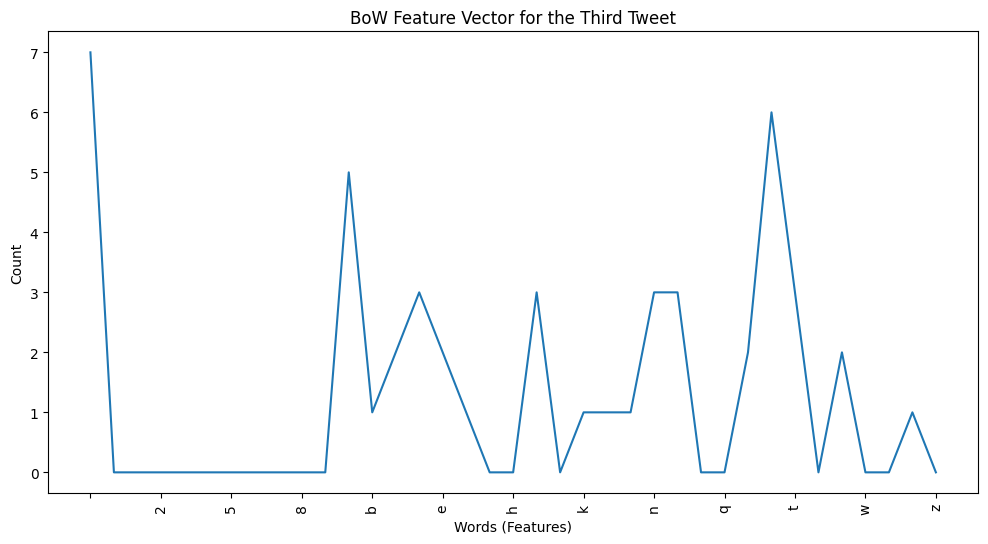

In [34]:
X_train_dense = X_train.toarray()

# Get the feature names
feature_names = count_vector.get_feature_names_out()

# Ensure there are at least 3 tweets in training data
if X_train_dense.shape[0] > 2:
    tweet_bow = X_train_dense[2, :]

    # Plot the BoW feature vector
    plt.figure(figsize=(12, 6))
    plt.plot(tweet_bow)

    # Show every 500th word for clarity
    step = min(500, len(feature_names) // 10)  # Adjust step dynamically
    plt.xticks(np.arange(0, len(feature_names), step), feature_names[::step], rotation=90)
    
    plt.xlabel('Words (Features)')
    plt.ylabel('Count')
    plt.title('BoW Feature Vector for the Third Tweet')
    plt.show()
else:
    print("Not enough training samples to visualize the third tweet.")


### Tokenization & padding

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000  # Limit vocabulary size
max_len = 50  # Fixed length for sequences

def tokenize_pad_sequences(text, max_words=max_words, max_len=max_len):
    '''
    Tokenizes the input text into sequences of integers and pads sequences to the same length.
    '''
    text = text.fillna('')  # Handle missing values

    # Initialize and fit tokenizer
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)

    # Transform text to sequences of integers
    X = tokenizer.texts_to_sequences(text)

    # Pad sequences to ensure uniform shape
    X = pad_sequences(X, padding='post', maxlen=max_len)

    return X, tokenizer

# Apply function to dataset
X, tokenizer = tokenize_pad_sequences(df['clean_text'])

# Sample Output
print('First Tweet after Tokenization & Padding:\n', X[0])
print('\nTotal Unique Words in Tokenizer:', len(tokenizer.word_index))

# Optional: Inspect the first 10 words and their assigned indices
print('\nWord Index (First 10 words):', dict(list(tokenizer.word_index.items())[:10]))


First Tweet after Tokenization & Padding:
 [  42    1  307   66 1726 1119   40 2378    2 1211  205    2  215   32
  155  100   49   69 1068  215   50    3    6  546    3   50 4179    3
 2806    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]

Total Unique Words in Tokenizer: 113678

Word Index (First 10 words): {'modi': 1, 'the': 2, 'and': 3, 'for': 4, 'you': 5, 'not': 6, 'will': 7, 'this': 8, 'india': 9, 'are': 10}


### saving tokenized data

In [36]:
import pickle

# Saving the tokenizer object
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Loading the tokenizer object
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Now you can use the tokenizer object as before


### Train test split

In [37]:
# Convert the categorical target labels into one-hot encoding
y = pd.get_dummies(df['category'])

# Split data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Split training data further to create a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Print the shape of each dataset
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (97781, 50) (97781, 3)
Validation Set -> (32594, 50) (32594, 3)
Test Set -> (32594, 50) (32594, 3)


In [38]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    # Calculate F1 score
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val


# LSTM

In [41]:


# Model parameters
vocab_size = 5000
embedding_size = 32
max_len = 50
epochs = 20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

# Optimizer setup
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate)

# Build the model
model = Sequential([
    Embedding(vocab_size, embedding_size, input_length=max_len),
    Conv1D(32, 3, padding='same', activation='relu'),
    MaxPooling1D(2),
    Bidirectional(LSTM(32)),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
# import tensorflow as tf
# import pydot
# tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_plot.png')

# import tensorflow as tf
# tf.keras.utils.plot_model(model, show_shapes=True)

In [44]:
from tensorflow.keras.metrics import Precision, Recall

print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.5949 - loss: 0.8695 - precision: 0.6502 - recall: 0.4353 - val_accuracy: 0.8800 - val_loss: 0.3557 - val_precision: 0.8821 - val_recall: 0.8776
Epoch 2/20
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9080 - loss: 0.3040 - precision: 0.9100 - recall: 0.9053 - val_accuracy: 0.9399 - val_loss: 0.2200 - val_precision: 0.9418 - val_recall: 0.9378
Epoch 3/20
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9401 - loss: 0.2235 - precision: 0.9424 - recall: 0.9378 - val_accuracy: 0.9439 - val_loss: 0.2028 - val_precision: 0.9472 - val_recall: 0.9412
Epoch 4/20
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9472 - loss: 0.2018 - precision: 0.9500 - recall: 0.9442 - val_accuracy: 0.9481 - val_loss: 0.1901 - val_precision: 0.9507 - val_recall: 0.9460
Epoch 5/20
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9514 - loss: 0.1883 - precision: 0.9549 - recall: 0.9487 - val_accura

In [45]:
# Evaluate the model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

# Print evaluation metrics
print(f"\nAccuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1_score(precision, recall):.4f}")



Accuracy  : 0.9493
Precision : 0.9519
Recall    : 0.9470
F1 Score  : 0.9494


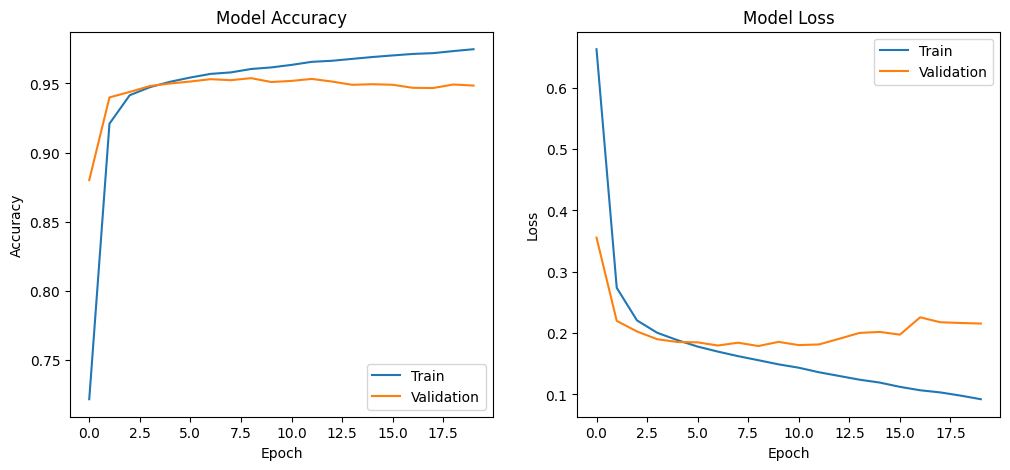

In [46]:
def plot_training_history(history):
    '''Plot accuracy and loss for training and validation'''
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot
    ax[0].plot(history.history['accuracy'], label='Train')
    ax[0].plot(history.history['val_accuracy'], label='Validation')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    # Loss plot
    ax[1].plot(history.history['loss'], label='Train')
    ax[1].plot(history.history['val_loss'], label='Validation')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.show()

# Call the function
plot_training_history(history)


1019/1019 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


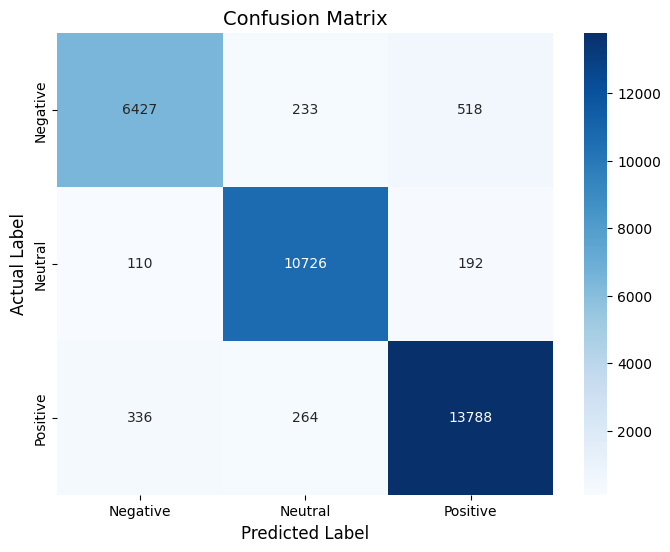

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, X_test, y_test):
    '''Plots the confusion matrix for the model predictions'''

    # Define sentiment labels
    labels = ['Negative', 'Neutral', 'Positive']

    # Predict the classes
    y_pred = model.predict(X_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
    
    plt.title('Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('Actual Label', fontsize=12)
    plt.show()

# Call the function
plot_confusion_matrix(model, X_test, y_test)


In [48]:
# Save the trained model
model.save('best_model.h5')
print("Best model saved successfully!")


Best model saved successfully!


In [49]:
from keras.models import load_model

# Load the trained model
model = load_model('best_model.h5')

def predict_class(text):
    """Predict the sentiment class of the given text."""
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len = 50  # Ensure it matches the training preprocessing
    
    # Convert text to a sequence of integers
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Predict the class
    yt = model.predict(xt).argmax(axis=1)
    # Output the predicted sentiment
    print(f'The predicted sentiment is: {sentiment_classes[yt[0]]}')


In [50]:
predict_class(['"I hate when I have to call and wake people up'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
The predicted sentiment is: Negative


In [51]:
text = "I love this product!"
predict_class([text])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The predicted sentiment is: Positive


In [52]:
predict_class(["happy sad negative naive"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The predicted sentiment is: Positive


In [53]:
predict_class(["what the hell kinda thing is this."])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The predicted sentiment is: Neutral


In [54]:
predict_class(["are you kidding me"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The predicted sentiment is: Neutral


In [55]:
predict_class(["What the guilt"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
The predicted sentiment is: Neutral


In [56]:
predict_class(["they should be fail"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The predicted sentiment is: Negative
